In [ ]:
import numpy as np

# ---------- Step 1: Input Data ----------
# Each row is a fruit: [Color Intensity, Weight]
X = np.array([
    [0.9, 150],  # Possibly an Apple
    [0.2, 120],  # Possibly a Banana
    [0.6, 160]   # Possibly an Orange
])

# Class labels (just for info): 0=Apple, 1=Banana, 2=Orange

# ---------- Step 2: Initialize weights and biases ----------
# 3 classes, 2 features --> weight matrix shape = (3, 2)
W = np.array([
    [0.01, 0.05],   # Weights for Apple
    [-0.02, 0.03],  # Weights for Banana
    [0.03, 0.01]    # Weights for Orange
])

# Biases for each class
b = np.array([0.5, 0.2, 0.1])

# ---------- Step 3: Softmax Function ----------
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # for numerical stability
    return exp_z / np.sum(exp_z)

# ---------- Step 4: Predict Function ----------
def predict(x):
    z = np.dot(W, x) + b     # Linear combination (z = W*x + b)
    probs = softmax(z)       # Softmax probabilities
    predicted_class = np.argmax(probs)  # Class with highest probability
    return predicted_class, probs

# ---------- Step 5: Run Prediction ----------
fruit_names = ["Apple", "Banana", "Orange"]

for i, x in enumerate(X):
    label, prob = predict(x)
    print(f"\nSample {i+1}: Features = {x}")
    print(f"Predicted Class: {fruit_names[label]}")
    print(f"Probabilities: {prob.round(3)}")


In [7]:
import numpy as np

# Features (X): shape = (9 samples, 2 features)
X = np.array([
    [1.0, 2.0],  
    [1.2, 1.8],  
    [0.8, 2.2],  
    [3.0, 3.5],  
    [2.8, 3.0], 
    [3.2, 2.8], 
    [5.5, 6.0], 
    [6.0, 5.8], 
    [5.8, 6.2]  
])

# Labels (y): 3 classes (0, 1, 2)
y = np.array([
    0, 0, 0,  
    1, 1, 1,  
    2, 2, 2   
])


In [6]:
X

array([[1. , 1. , 2. ],
       [1. , 1.2, 1.8],
       [1. , 0.8, 2.2],
       [1. , 3. , 3.5],
       [1. , 2.8, 3. ],
       [1. , 3.2, 2.8],
       [1. , 5.5, 6. ],
       [1. , 6. , 5.8],
       [1. , 5.8, 6.2]])

In [4]:
W = np.array([
    [0.01, 0.05],   
    [-0.02, 0.03],  
    [0.03, 0.01]    
])
b = np.array([0.5, 0.2, 0.1])

In [ ]:
z =  np.dot(X,W)

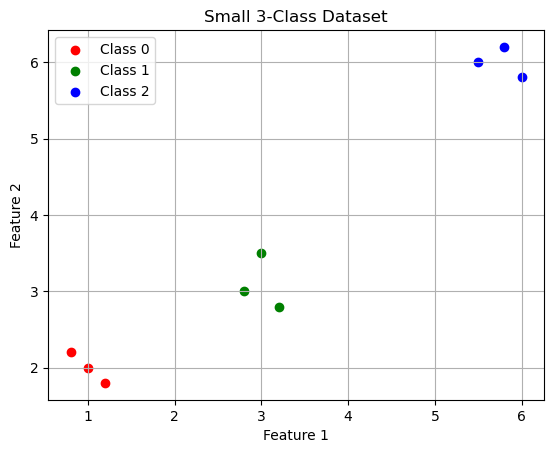

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='blue', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Small 3-Class Dataset')
plt.legend()
plt.grid(True)
plt.show()


2025-07-28 01:30:13.319 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 01:30:14.978 
  command:

    streamlit run d:\anaconda\envs\tf-env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-28 01:30:14.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 01:30:14.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 01:30:14.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 01:30:14.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 01:30:14.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 01:30:14.988 Thread 'MainThread': mis

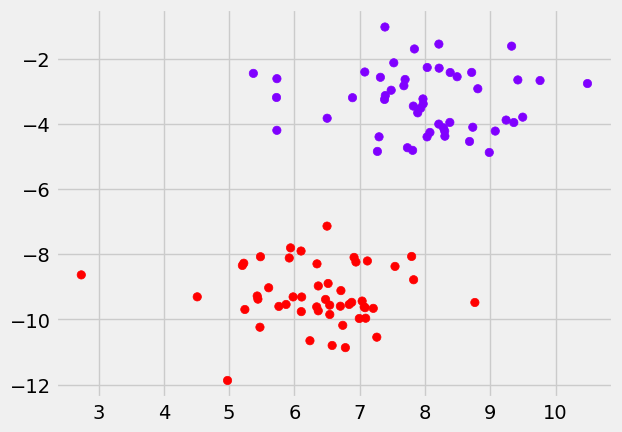

In [1]:
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification,make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def load_initial_graph(dataset,ax):
    if dataset == "Binary":
        X, y = make_blobs(n_features=2, centers=2,random_state=6)
        ax.scatter(X.T[0], X.T[1], c=y, cmap='rainbow')
        return X,y
    elif dataset == "Multiclass":
        X,y = make_blobs(n_features=2, centers=3,random_state=2)
        ax.scatter(X.T[0], X.T[1], c=y, cmap='rainbow')
        return X,y

def draw_meshgrid():
    a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01)
    b = np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)

    XX, YY = np.meshgrid(a, b)

    input_array = np.array([XX.ravel(), YY.ravel()]).T

    return XX, YY, input_array


plt.style.use('fivethirtyeight')

st.sidebar.markdown("# Logistic Regression Classifier")

dataset = st.sidebar.selectbox(
    'Select Dataset',
    ('Binary','Multiclass')
)

penalty = st.sidebar.selectbox(
    'Regularization',
    ('l2', 'l1','elasticnet','none')
)

c_input = float(st.sidebar.number_input('C',value=1.0))

solver = st.sidebar.selectbox(
    'Solver',
    ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
)

max_iter = int(st.sidebar.number_input('Max Iterations',value=100))

multi_class = st.sidebar.selectbox(
    'Multi Class',
    ('auto', 'ovr', 'multinomial')
)

l1_ratio = int(st.sidebar.number_input('l1 Ratio'))

# Load initial graph
fig, ax = plt.subplots()

# Plot initial graph
X,y = load_initial_graph(dataset,ax)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
orig = st.pyplot(fig)

if st.sidebar.button('Run Algorithm'):
    orig.empty()

    clf = LogisticRegression(penalty=penalty,C=c_input,solver=solver,max_iter=max_iter,multi_class=multi_class,l1_ratio=l1_ratio)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    XX, YY, input_array = draw_meshgrid()
    labels = clf.predict(input_array)

    ax.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5, cmap='rainbow')
    plt.xlabel("Col1")
    plt.ylabel("Col2")
    orig = st.pyplot(fig)
    st.subheader("Accuracy for Decision Tree  " + str(round(accuracy_score(y_test, y_pred), 2)))